In [1]:
from CyNN import *

### Load Example Images
The following images are flourescense microscopy images microtubulues of mouse embryonic fibroblasts on a micropattern.

_Image credit: Anna Blob, Köster Lab Univ. Göttingen_

In [2]:
image1 = np.asfarray(Image.open("example_img/7-cell_C002T001.tif"))

Text(0.5, 0.98, 'MEF Microtubule Networks - Fluorescence Microscopy Images')

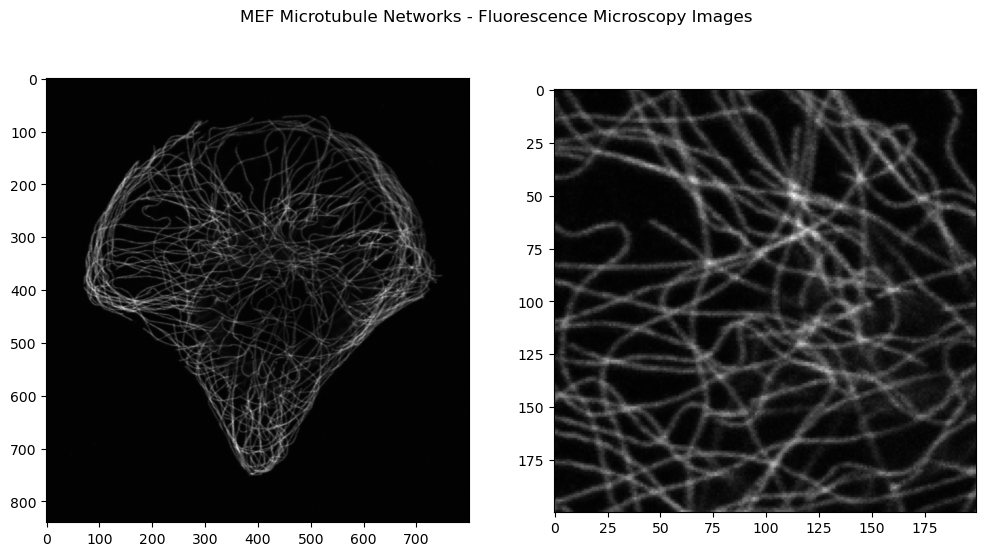

In [3]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image1,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(image1[200:400,200:400],cmap='gray')
plt.suptitle("MEF Microtubule Networks - Fluorescence Microscopy Images")

### Train or Load a Filament Reconstruction Model
We generate some trainign data with the default forward model for fluorescence micrsopscopy imaging and random filament configurations. To see how to specify the forward model check out `Forward Model Demo.ipynb`

In [4]:
# train a model if necessary
#fixed_model = FilamentReconstructor.train_model(10000,(80,80,16),6)

In [5]:
# save the model
#fixed_model.save("models/fixed_80")

In [6]:
# load the model again
fixed_model = FilamentReconstructor.load_model("models/fixed_80")

Metal device set to: Apple M1 Pro


2024-02-19 23:55:17.332831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-19 23:55:17.332952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Apply the Model

In [7]:
C1 = Cell(image1,{"name":"fixed-cell-7"})

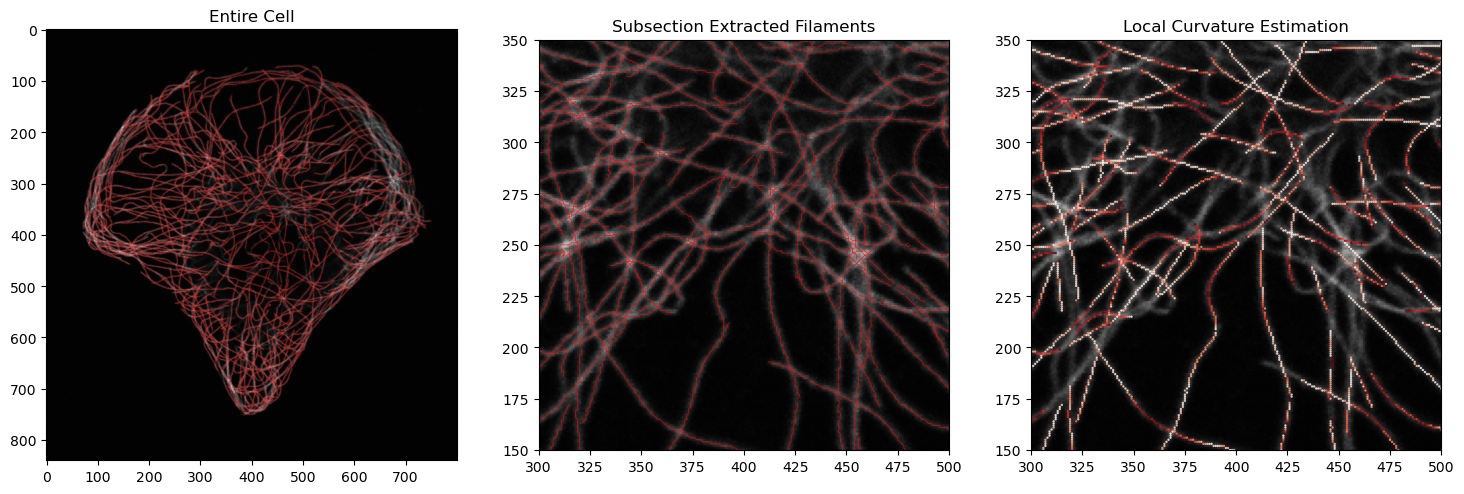

In [8]:
xshift = 20
yshift = 20
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(image1,cmap='gray')
plt.title("Entire Cell")
for c in C1.filament.curves:
    plt.plot(c.y+yshift,c.x+xshift,linewidth=0.5,alpha=0.5,c='red')
plt.subplot(1,3,2)
plt.xlim(300,500)
plt.ylim(150,350)
plt.imshow(image1,cmap='gray')
plt.title("Subsection Extracted Filaments")
for c in C1.filament.curves:
    if c.N > 3:
        plt.plot(c.y+yshift,c.x+xshift,linewidth=0.5,alpha=0.8,c='red')
plt.subplot(1,3,3)
plt.xlim(300,500)
plt.ylim(150,350)
plt.imshow(image1,cmap='gray')
plt.title("Local Curvature Estimation")
for c in C1.filament.curves:
    if c.N > 20:
        plt.scatter(c.y+yshift,c.x+xshift,s=0.5,alpha=0.8,cmap='Reds',c=np.abs(c.k))